# Importing Libraries

In [387]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

In [317]:
data = pd.read_csv('heart.csv')

In [318]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [270]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Split into Numerical_cols and categorical_cols

In [271]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
print("There are", len(numerical_cols), "numerical  features in heart dataset:")
print(numerical_cols, "\n")

categorical_cols = data.select_dtypes(include=np.object).columns.tolist()
print("There are", len(categorical_cols), "categorical features in heart dataset:")
print(categorical_cols)

There are 7 numerical  features in heart dataset:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease'] 

There are 5 categorical features in heart dataset:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [272]:
print("There are", len(categorical_cols), "categorical features in heart dataset:", "\n", categorical_cols, "\n")
for i in categorical_cols:
    category_no = data[i].nunique()
    category_name = data[i].unique().tolist()
    print(i, "has", category_no, "unique variable:")
    print(category_name, "\n")

There are 5 categorical features in heart dataset: 
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 

Sex has 2 unique variable:
['M', 'F'] 

ChestPainType has 4 unique variable:
['ATA', 'NAP', 'ASY', 'TA'] 

RestingECG has 3 unique variable:
['Normal', 'ST', 'LVH'] 

ExerciseAngina has 2 unique variable:
['N', 'Y'] 

ST_Slope has 3 unique variable:
['Up', 'Flat', 'Down'] 



# Plotting the Categorical data

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Count'>

<Figure size 720x576 with 0 Axes>

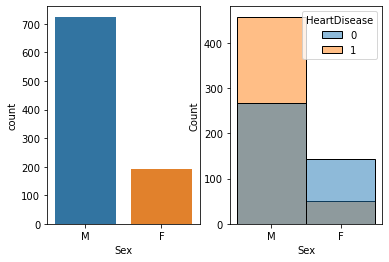

In [273]:
plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(1,2)
sns.countplot(data['Sex'], ax=ax[0])
sns.histplot(x=data['Sex'],data=data, hue='HeartDisease')

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

<Figure size 720x576 with 0 Axes>

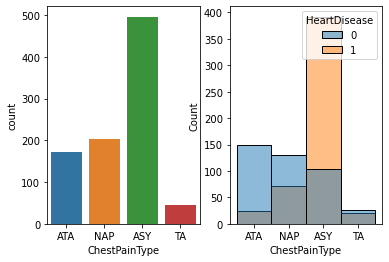

In [274]:
plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(1,2)
sns.countplot(data['ChestPainType'], ax=ax[0])
sns.histplot(x=data['ChestPainType'],data=data, hue='HeartDisease', ax=ax[1])

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

<Figure size 720x576 with 0 Axes>

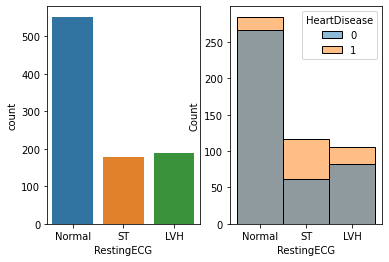

In [275]:
plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(1,2)
sns.countplot(data.RestingECG, ax=ax[0])
sns.histplot(x=data['RestingECG'],data=data, hue='HeartDisease')

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

<Figure size 720x576 with 0 Axes>

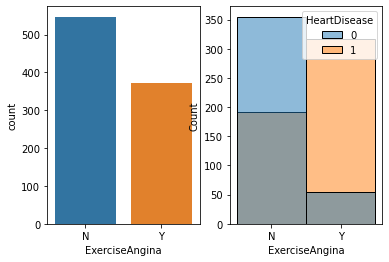

In [276]:
plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(1,2)
sns.countplot(data.ExerciseAngina, ax=ax[0])
sns.histplot(x=data['ExerciseAngina'],data=data, hue='HeartDisease')

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

<Figure size 720x576 with 0 Axes>

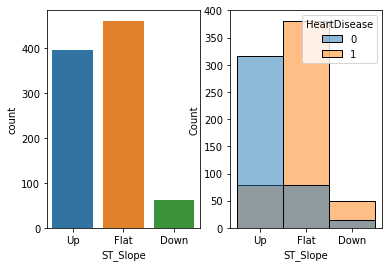

In [277]:
plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(1,2)
sns.countplot(data.ST_Slope, ax=ax[0])
sns.histplot(x=data['ST_Slope'],data=data, hue='HeartDisease')

### Here we see that:
### Higher Chances of getting Heart Disease:
### if Sex ---------------> Male
### if ChestPainType -----> ASY
### RestingECG -----------> ST
### ExerciseAngina -------> Yes
### ST_Slope -------------> Flat

# Plotting The Numerical Data

In [278]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

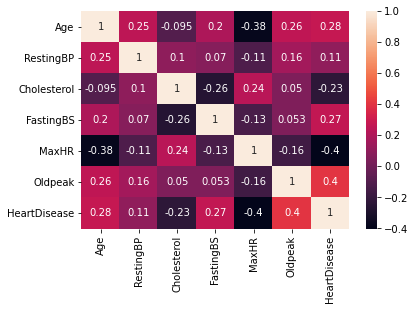

In [279]:
sns.heatmap(data.corr(), annot=True)

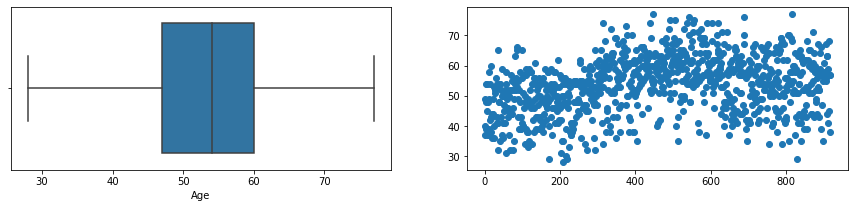

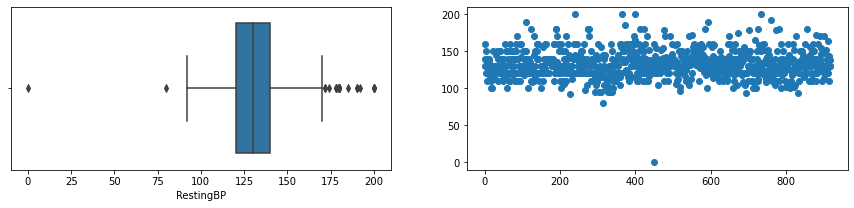

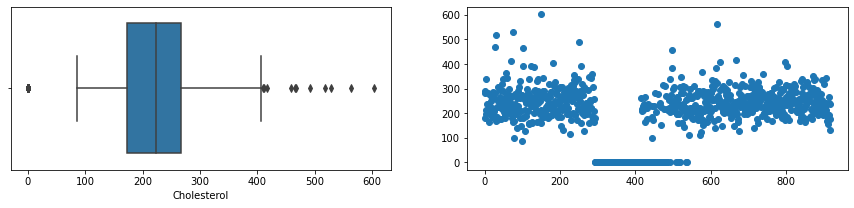

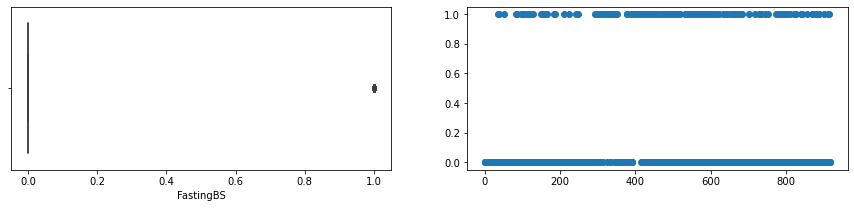

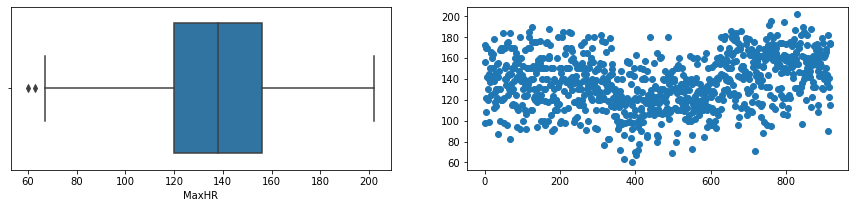

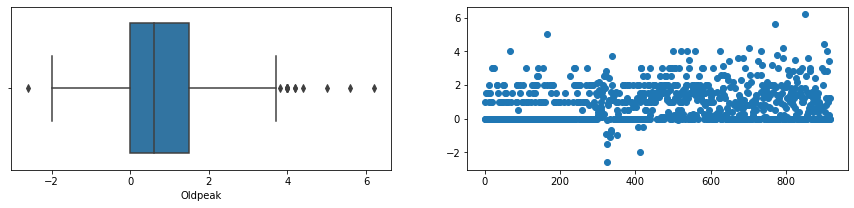

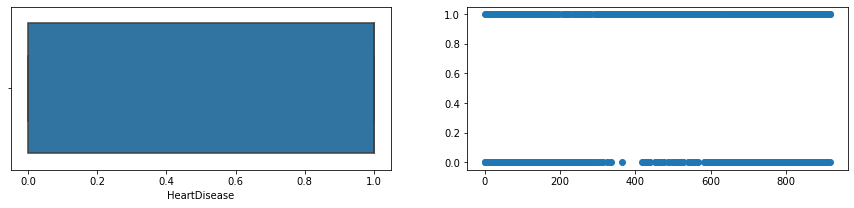

In [280]:
for i in numerical_cols:
    fig, ax = plt.subplots(1,2, figsize=(15,3))
    sns.boxplot(x=data[i], data=data, ax=ax[0])
    plt.scatter(data.index, data[i])

### In the above diagram, Cholesterol and RestingBP has some outlies
### So, Remove the outliers from both the features

In [281]:
median = data.Cholesterol.median()
median

223.0

In [282]:
data["Cholesterol"] = np.where(data["Cholesterol"] >400, median,data['Cholesterol'])

(918,)


F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

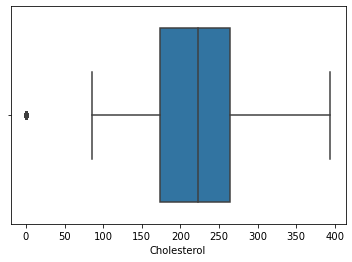

In [283]:
print(data.Cholesterol.shape)
sns.boxplot(data.Cholesterol)

In [284]:
median1 = data.RestingBP.median()
median1

130.0

In [285]:
data['RestingBP'] = np.where(data['RestingBP'] > 130, median1, data['RestingBP'])
data['RestingBP'] = np.where(data['RestingBP'] < 110, median1, data['RestingBP'])

In [286]:
print(data.RestingBP.shape)

(918,)


<AxesSubplot:xlabel='RestingBP'>

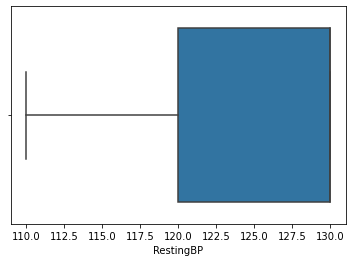

In [287]:
sns.boxplot(x=data.RestingBP, data=data)

In [288]:
data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# Convert categorical data into numeric format

In [326]:
label_encoder = LabelEncoder()
data[categorical_cols] = (data[categorical_cols]).apply(label_encoder.fit_transform)
data[categorical_cols]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


### Convert Numeric features to standardisation (range between -1 to 1), because the value present in our numeric_cols has contain high and low value
### So, I want to scale down in the same format. By which our machine does work perfectly.

In [327]:
Standardisation = StandardScaler()
y_standard = Standardisation.fit_transform(data[numerical_cols[:-1]])

In [328]:
y_standard

array([[-1.4331398 ,  0.41090889,  0.82507026, -0.55134134,  1.38292822,
        -0.83243239],
       [-0.47848359,  1.49175234, -0.17196105, -0.55134134,  0.75415714,
         0.10566353],
       [-1.75135854, -0.12951283,  0.7701878 , -0.55134134, -1.52513802,
        -0.83243239],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, -0.55134134, -0.85706875,
         0.29328271],
       [ 0.37009972, -0.12951283,  0.34027522, -0.55134134,  1.4615246 ,
        -0.83243239],
       [-1.64528563,  0.30282455, -0.21769643, -0.55134134,  1.42222641,
        -0.83243239]])

### x = Independent feature
### y = Target
### And split into train, test set

In [329]:
x = data.drop(['HeartDisease'], axis=1)
y = data.HeartDisease

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Logistic Regression

In [331]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        94
           1       0.83      0.87      0.85        90

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix :
[[78 16]
 [12 78]]


<AxesSubplot:>

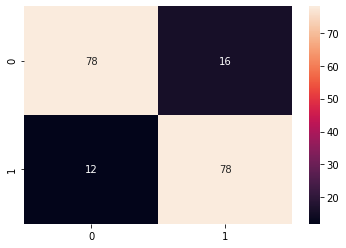

In [345]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
sns.heatmap(cm, annot=True)

In [346]:
model.score(x_train, y_train)

0.8596730245231607

# Decision Tree

In [355]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        94
           1       0.79      0.79      0.79        90

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



confusion matrix :


<AxesSubplot:>

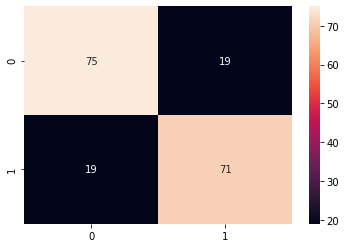

In [358]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix :")
sns.heatmap(cm, annot=True)

In [359]:
DT.score(x_train, y_train)

1.0

# Random Forest

In [362]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        94
           1       0.86      0.90      0.88        90

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



confusion matrix :


<AxesSubplot:>

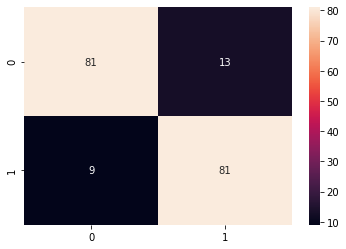

In [363]:
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix :")
sns.heatmap(cm, annot=True)

In [365]:
RF.score(x_train, y_train)

1.0

# KNN

In [373]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        94
           1       0.68      0.79      0.73        90

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



confusion matrix :


<AxesSubplot:>

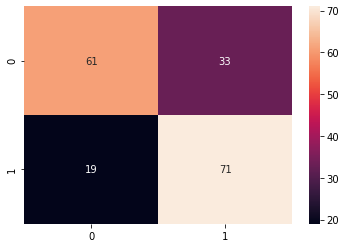

In [374]:
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix :")
sns.heatmap(cm, annot=True)

In [376]:
knn.score(x_train, y_train)

0.7888283378746594

# Naive Bayes

In [378]:
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        94
           1       0.86      0.87      0.86        90

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



confusion matrix :


<AxesSubplot:>

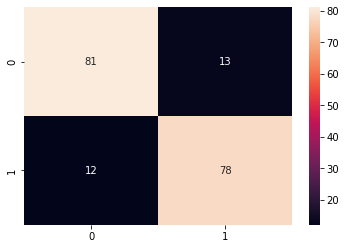

In [379]:
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix :")
sns.heatmap(cm, annot=True)

In [380]:
NB.score(x_train, y_train)

0.8555858310626703

In [390]:
Final_Result = {'Model_Name':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes'], 
                'Accuracy':['85%', '79%', '88%', '72%', '86%']}
df = pd.DataFrame(Final_Result)
df

,Model_Name,Accuracy
0,Logistic Regression,85%
1,Decision Tree,79%
2,Random Forest,88%
3,KNN,72%
4,Naive Bayes,86%
